In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('car data.csv')
df.head()
# Target - Selling price

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


###### Первичный анализ

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#категориальные признаки
for i in df.select_dtypes('object').columns:
    print(i)
    print(df[i].value_counts())
    print("_" *40)

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
________________________________________
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
________________________________________
Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
________________________________________
Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64
________________________________________


### EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_5116\3424586591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

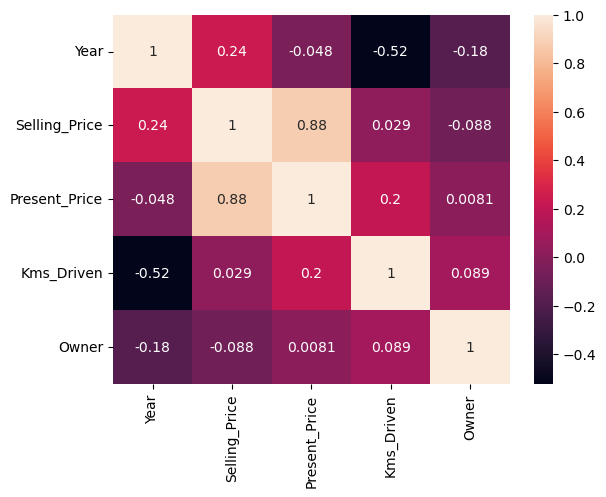

In [8]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True)

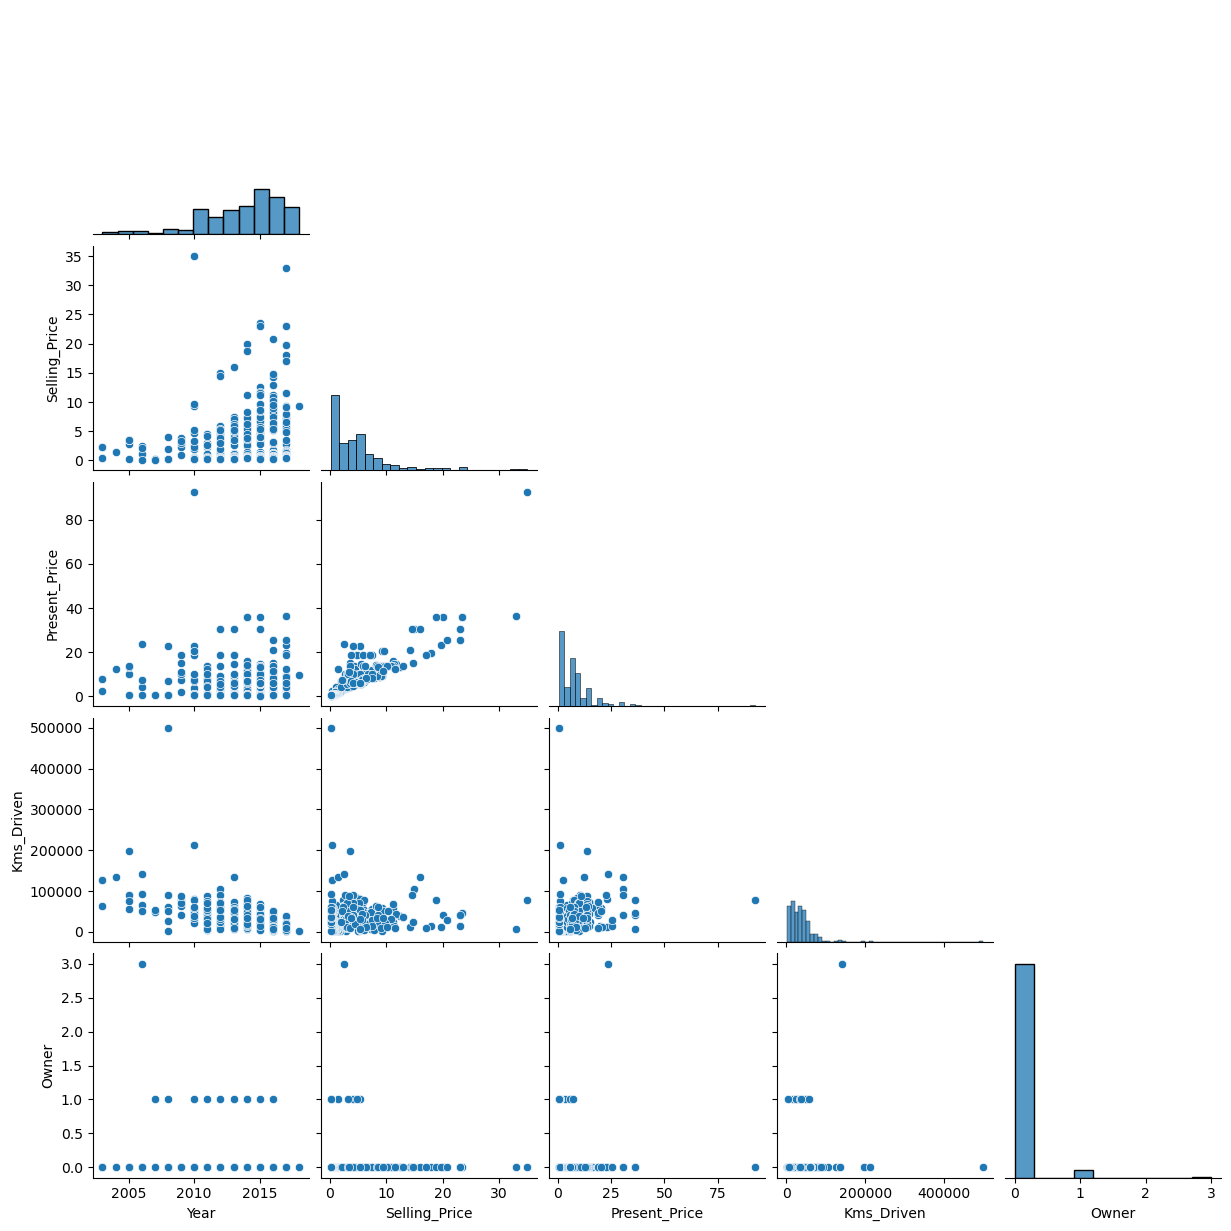

In [9]:
sns.pairplot(df ,corner=True)

<Axes: xlabel='Year', ylabel='Count'>

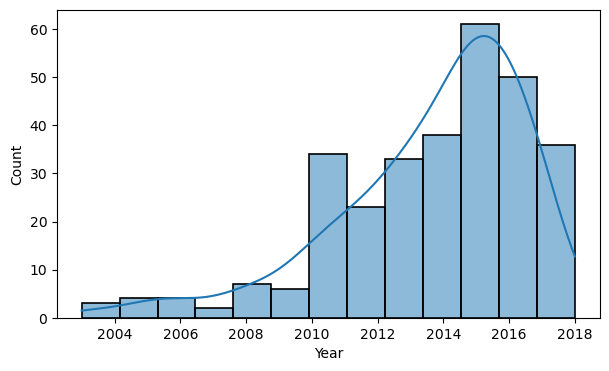

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(x='Year',data=df, kde=True, lw=1.2)

<Axes: xlabel='Selling_Price', ylabel='Count'>

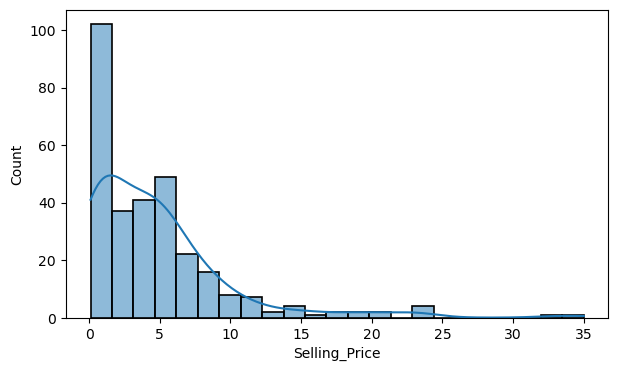

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(x='Selling_Price',data=df, kde=True, lw=1.2)

<Axes: xlabel='Present_Price', ylabel='Count'>

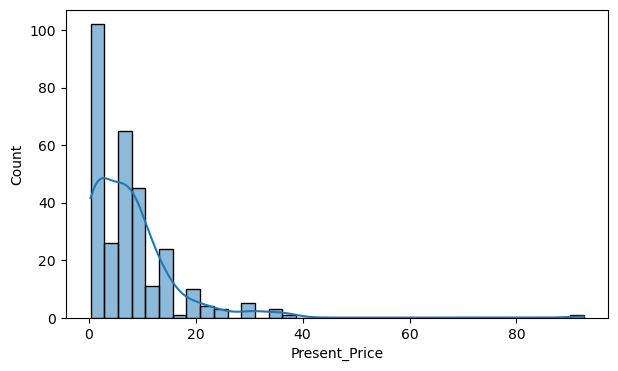

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(x='Present_Price',data=df, kde=True, lw=1.2)

<Axes: xlabel='Kms_Driven', ylabel='Count'>

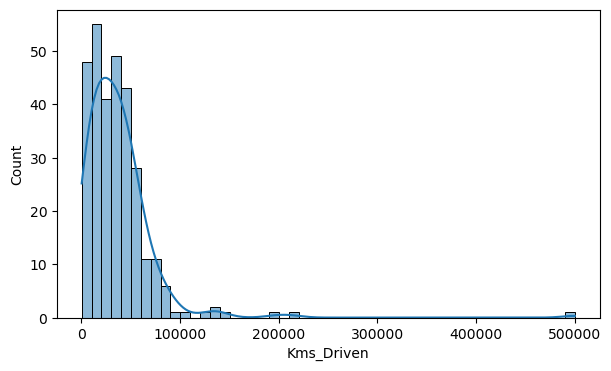

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(x='Kms_Driven',data=df, kde=True, lw=1.2)

Видим что есть выбросы справа,позже удалим их с помощью пайплайна

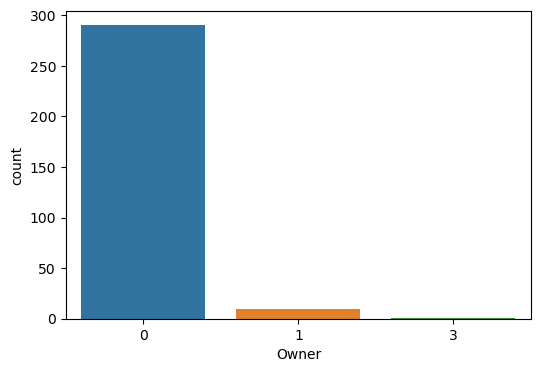

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Owner', data=df);

<Axes: xlabel='Fuel_Type', ylabel='count'>

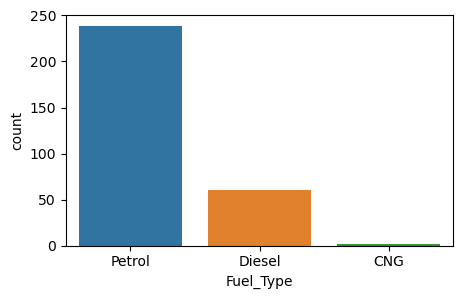

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x='Fuel_Type', data=df)

<Axes: xlabel='Seller_Type', ylabel='count'>

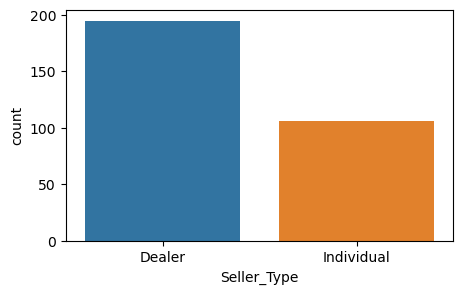

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x='Seller_Type', data=df)

<Axes: xlabel='Transmission', ylabel='count'>

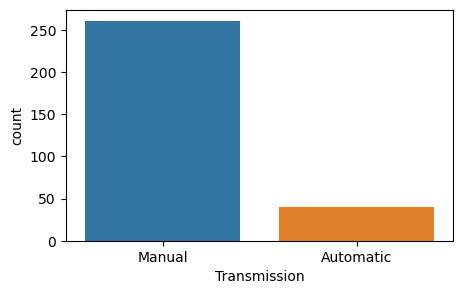

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x='Transmission', data=df)

*Зависимость 'Selling_Price' и других признаков*

Text(0.5, 1.0, 'Selling_Price vs Present_Price')

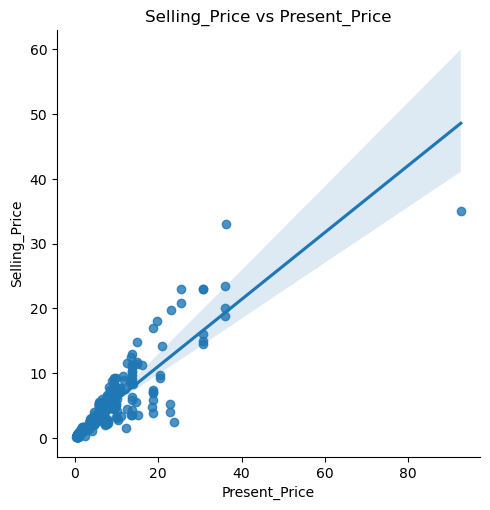

In [18]:
sns.lmplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling_Price vs Present_Price')

Text(0.5, 1.0, 'Selling_Price vs Year')

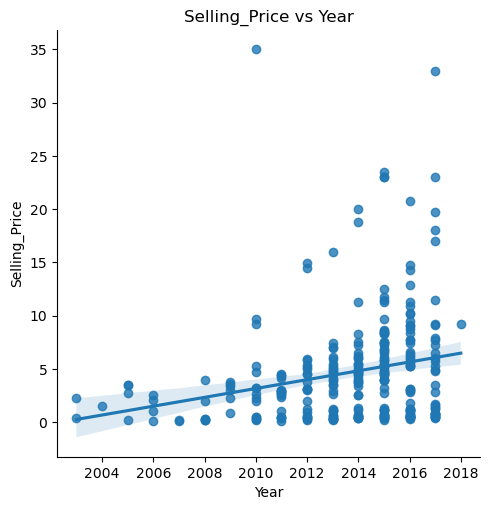

In [19]:
sns.lmplot(x='Year', y='Selling_Price', data=df, )
plt.title('Selling_Price vs Year')

Text(0.5, 1.0, 'Selling_Price vs Kms_driven')

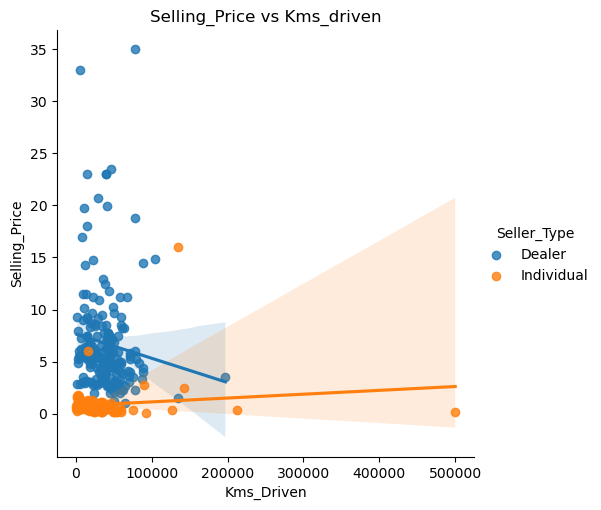

In [20]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=df, hue='Seller_Type')
plt.title('Selling_Price vs Kms_driven')

Цена падает от возрастания пробега автомобиля

### Подготовка данных

In [21]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [65]:
#разбиваем данные на обучающую и тестовую
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [66]:
#создадим пайплайн который заменит выбросы на медиану и удалит категориальные признаки
class DataPipeline:
    """Подготовка исходных данных"""
    def __init__(self):
        """Параметры класса"""
        self.Kms_driven_max=None
        self.Kms_driven_median=None
        self.del_cols=None
        
    def fit(self,df,y=None):
        """Сохранение статистик"""
        self.Kms_driven_max=300000
        self.Kms_driven_median=df['Kms_Driven'].median()
        self.del_cols=['Fuel_Type','Seller_Type', 'Transmission']
        
        return self
    def transform(self,df,y=None):
        """Преобразование данных"""
        df.loc[df['Kms_Driven']>self.Kms_driven_max,'Kms_Driven']=self.Kms_driven_median
        
        if 'Car_Name' in df.columns:
            df.drop(columns='Car_Name', inplace=True)
        for col in self.del_cols:
            if col in df.columns:
                df.drop(columns=col,inplace=True)
                
        return df              

In [67]:
#масштабируем признаки с помощью Стандартизации
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    DataPipeline(),
    StandardScaler()
)

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X_train

array([[-2.30056096e-01,  1.85939695e-01,  2.36309797e-01,
        -1.65521178e-01],
       [ 4.64744193e-01, -2.31543990e-01, -5.14644180e-01,
        -1.65521178e-01],
       [ 8.12144337e-01,  1.42208279e+00, -8.27899267e-01,
        -1.65521178e-01],
       [ 4.64744193e-01, -6.91428362e-01, -6.56252644e-01,
        -1.65521178e-01],
       [ 1.17344049e-01, -7.81665721e-01, -7.69539415e-01,
        -1.65521178e-01],
       [-1.27225653e+00,  1.37207173e+00,  7.85578991e-01,
        -1.65521178e-01],
       [ 1.15954448e+00, -2.20672019e-01, -5.87593995e-01,
        -1.65521178e-01],
       [ 8.12144337e-01, -4.42460227e-01, -8.93845900e-01,
        -1.65521178e-01],
       [-2.30056096e-01,  2.25078791e-01,  6.22240064e-01,
        -1.65521178e-01],
       [ 1.17344049e-01, -4.75076139e-01,  3.14580657e-01,
        -1.65521178e-01],
       [ 4.64744193e-01, -6.91428362e-01, -6.39087981e-01,
        -1.65521178e-01],
       [ 8.12144337e-01, -6.44678887e-01, -1.13686319e+00,
      

#### Построим Модель Линейной Регрессии

In [74]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)

#### Оценим качество модели

In [76]:
print('Train R2', lr.score(X_train, y_train))
print('Test R2', lr.score(X_test, y_test))

Train R2 0.8549806993659803
Test R2 0.8132340363458261


Train R2 0.8549806993659803
Test R2 0.8132340363458261
Train RMSE: 1.9745664502220506
Test RMSE: 2.0432318516683443


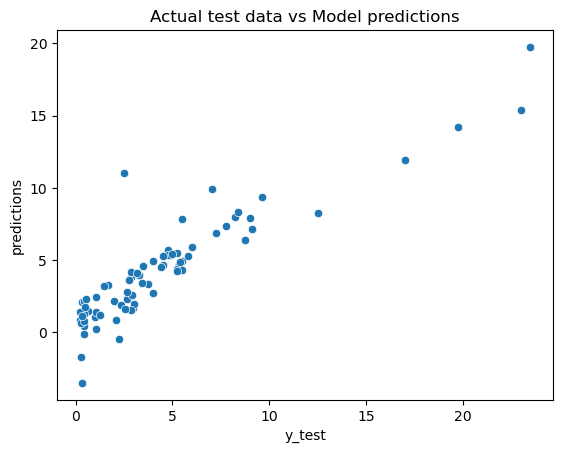

In [77]:
#в качестве метрики выберем RMSE
print('Train R2', lr.score(X_train, y_train))
print('Test R2', lr.score(X_test, y_test))

print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

#построим точечную диаграмму для сравнения фактических тестовых данных (y_test) с прогнозами моей модели (pred_test).
sns.scatterplot(x=y_test, y=pred_test);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions');


### ВЫВОДЫ
Коэффициент детерминации (R2):
На тренировочных данных: Примерно 86% изменчивости в данных объясняется моделью. 
На тестовых данных: Примерно 81%. 

Среднеквадратичное отклонение (RMSE):
На тренировочных данных: Модель ошибается в среднем на 1.98 единицы
На тестовых данных: Средняя ошибка составляет 2.04 единицы
Модель хорошо обучена и обладает хорошей обобщающей способностью на новых данных.
И нужно учитывать что конкретных требований по точности модели не было.